In [1]:
#refference1: https://www.tensorflow.org/tutorials/images/classification
#refference2: https://www.tensorflow.org/tutorials/images/transfer_learning
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [2]:
tf.__version__

'2.0.0'

## Data Loading using keras ImageDatagenerator
refference: https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [3]:
train_dir='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\train'
validation_dir='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\validation'
test_dir='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\test'
#data contraining mild to severe case of ptosis

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator=ImageDataGenerator(rescale=1./255)
batch_size=10

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(200, 300),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(200, 300),
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(200, 300),
                                                              class_mode='binary')

Found 346 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


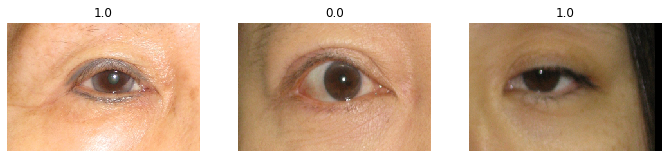

In [7]:
#show sample image
sample_images, label = next(train_data_gen)
plt.figure(figsize=(20,10))
for n in range(3):
    ax = plt.subplot(1,5,n+1)
    plt.imshow(sample_images[n])
    plt.axis('off')
    plt.title(str(label[n]))

In [8]:
#show data number
print('Train:',train_data_gen.n,'Validation:',val_data_gen.n,'Test:',test_data_gen.n)

Train: 346 Validation: 44 Test: 44


## Training using simple CNN 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set model
model_0 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(200, 300 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 59200)             0

In [10]:
#begin training
history = model_0.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.n,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.n,
    epochs=20,
)

Epoch 1/20
346/346 [==============================] - 95s 274ms/step - loss: 6.3761 - accuracy: 0.5825 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/20
346/346 [==============================] - 95s 275ms/step - loss: 6.3563 - accuracy: 0.5863 - val_loss: 7.5795 - val_accuracy: 0.5026
Epoch 3/20
346/346 [==============================] - 95s 275ms/step - loss: 6.4317 - accuracy: 0.5813 - val_loss: 7.4750 - val_accuracy: 0.5026
Epoch 4/20
346/346 [==============================] - 95s 275ms/step - loss: 6.3888 - accuracy: 0.5845 - val_loss: 7.7886 - val_accuracy: 0.5026
Epoch 5/20
346/346 [==============================] - 96s 277ms/step - loss: 6.3593 - accuracy: 0.5851 - val_loss: 7.8234 - val_accuracy: 0.5000
Epoch 6/20
346/346 [==============================] - 96s 278ms/step - loss: 6.3919 - accuracy: 0.5815 - val_loss: 7.8757 - val_accuracy: 0.5000
Epoch 7/20
346/346 [==============================] - 96s 278ms/step - loss: 6.3667 - accuracy: 0.5843 - val_loss: 7.8409 - val_ac

In [12]:
#save model, refference: https://www.tensorflow.org/tutorials/keras/save_and_load
model_0.save('model_simple_CNN.h5') 

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [146]:
#get history from file
import csv
acc=[]
val_acc=[]
loss=[]
val_loss=[]
with open('history_simple_CNN.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        acc.append(row[0])
        val_acc.append(row[1])
        loss.append(row[2])
        val_loss.append(row[3])

acc=acc[1:len(acc)]
val_acc=val_acc[1:len(val_acc)]
loss=loss[1:len(loss)]
val_loss=val_loss[1:len(val_loss)]
def list_to_float(target_list):
    for i in range(len(target_list)):
        target_list[i]=float(target_list[i])
    return target_list
acc=list_to_float(acc)
val_acc=list_to_float(val_acc)
loss=list_to_float(loss)
val_loss=list_to_float(val_loss)

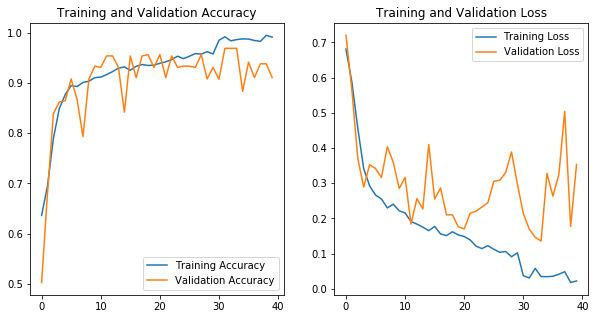

In [145]:
epochs_range = range(len(acc))
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#save training history
import csv
with open('history_simple_CNN.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)# 建立 CSV 檔寫入器
    writer.writerow(['acc','val_acc','loss','val_loss'])#write title to csv file
    for i in range(len(acc)):
        writer.writerow([acc[i],val_acc[i],loss[i],val_loss[i]])#save the history parameter

# Try Image Data Augmentation
refference:https://www.tensorflow.org/tutorials/images/classification<br>
refference:https://keras.io/preprocessing/image/

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(200, 300 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 59200)            

Found 346 images belonging to 2 classes.


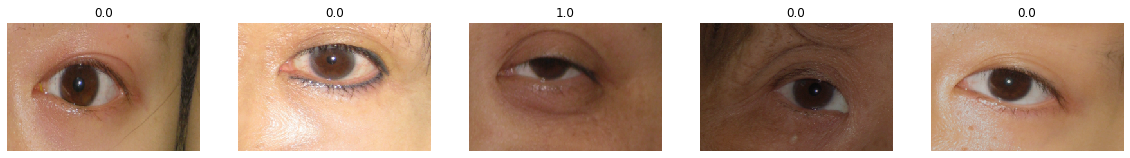

In [17]:
#data augmentation using fram work from keras.preprocessing
image_gen = ImageDataGenerator(rescale=1./255,
                    rotation_range=15,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    horizontal_flip=True,
                    fill_mode='reflect',
                    zoom_range= [0.9, 1.2],
                    brightness_range=(1,0.5))                              
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(200, 300),
                                               class_mode='binary')
augmented_images, label = next(train_data_gen)
plt.figure(figsize=(20,10))
for n in range(5):
    ax = plt.subplot(1,5,n+1)
    plt.imshow(augmented_images[n])
    plt.axis('off')
    plt.title(str(label[n]))
    

In [18]:
#begin training with data augmentation
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.n,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.n,
    epochs=30,
)


Epoch 1/30
346/346 [==============================] - 98s 283ms/step - loss: 0.6573 - accuracy: 0.6462 - val_loss: 0.7839 - val_accuracy: 0.5255
Epoch 2/30
346/346 [==============================] - 99s 286ms/step - loss: 0.4578 - accuracy: 0.7871 - val_loss: 0.1520 - val_accuracy: 0.9541
Epoch 3/30
346/346 [==============================] - 99s 287ms/step - loss: 0.2790 - accuracy: 0.8860 - val_loss: 0.0749 - val_accuracy: 0.9796
Epoch 4/30
346/346 [==============================] - 99s 285ms/step - loss: 0.2372 - accuracy: 0.9121 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 5/30
346/346 [==============================] - 99s 285ms/step - loss: 0.2210 - accuracy: 0.9128 - val_loss: 0.0807 - val_accuracy: 0.9770
Epoch 6/30
346/346 [==============================] - 99s 286ms/step - loss: 0.2122 - accuracy: 0.9193 - val_loss: 0.0820 - val_accuracy: 0.9541
Epoch 7/30
346/346 [==============================] - 99s 286ms/step - loss: 0.1871 - accuracy: 0.9258 - val_loss: 0.0693 - val_ac

In [19]:
#save model, refference: https://www.tensorflow.org/tutorials/keras/save_and_load
model.save('model_simple_CNN_augmented.h5') 

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [40]:
acc = acc+history.history['accuracy']
val_acc = val_acc+history.history['val_accuracy']
loss = loss+history.history['loss']
val_loss = val_loss+history.history['val_loss']

In [21]:
#get history from file
import csv
acc=[]
val_acc=[]
loss=[]
val_loss=[]
with open('history_simple_CNN_augmented.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        acc.append(row[0])
        val_acc.append(row[1])
        loss.append(row[2])
        val_loss.append(row[3])

acc=acc[1:len(acc)]
val_acc=val_acc[1:len(val_acc)]
loss=loss[1:len(loss)]
val_loss=val_loss[1:len(val_loss)]
def list_to_float(target_list):
    for i in range(len(target_list)):
        target_list[i]=float(target_list[i])
    return target_list
acc=list_to_float(acc)
val_acc=list_to_float(val_acc)
loss=list_to_float(loss)
val_loss=list_to_float(val_loss)

In [307]:
type(acc[0])

str

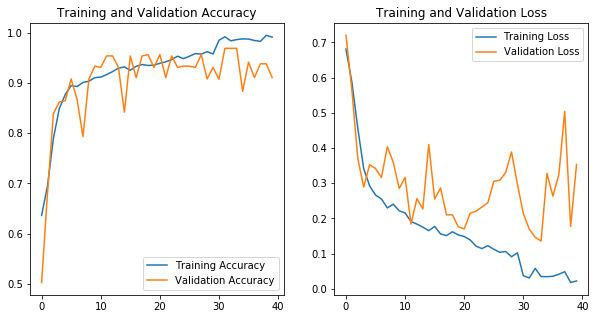

In [22]:
epochs_range = range(len(acc))
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
#save training history
import csv
with open('history_simple_CNN_augmented.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)# 建立 CSV 檔寫入器
    writer.writerow(['acc','val_acc','loss','val_loss'])#write title to csv file
    for i in range(len(acc)):
        writer.writerow([acc[i],val_acc[i],loss[i],val_loss[i]])#save the history parameter

## Model testing

In [ ]:
#load saved model
model=tf.keras.models.load_model('model_simple_CNN_augmented.h5')

Found 87 images belonging to 2 classes.


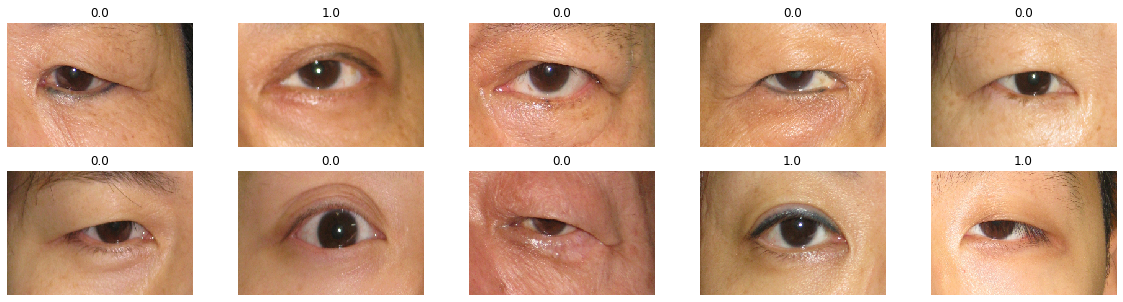

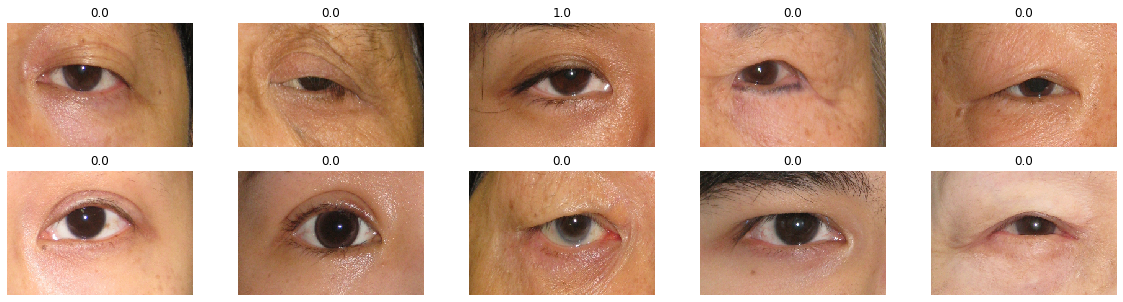

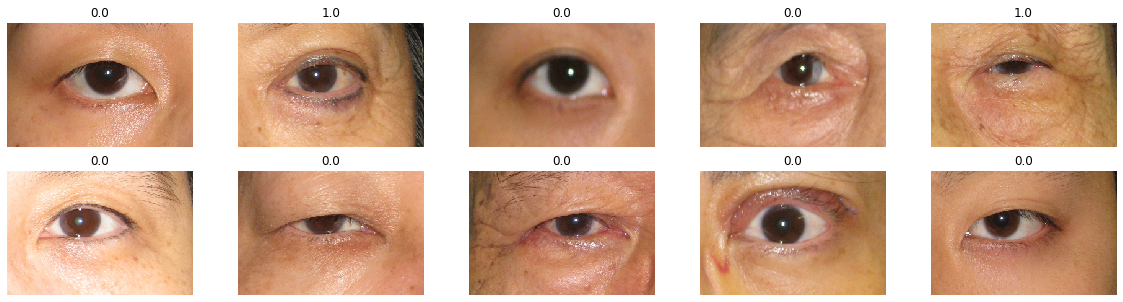

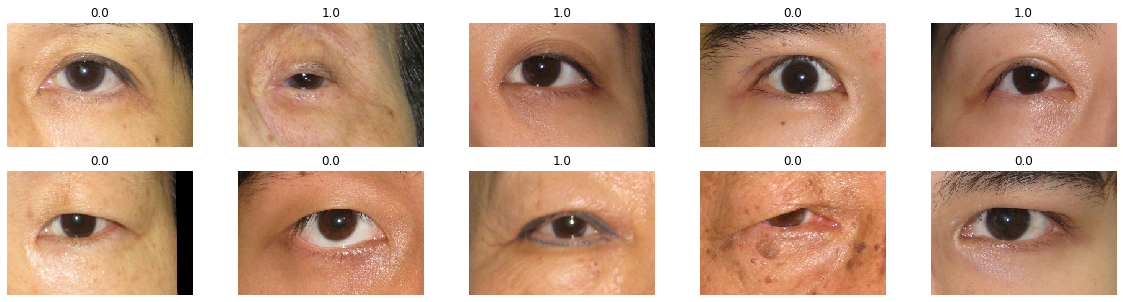

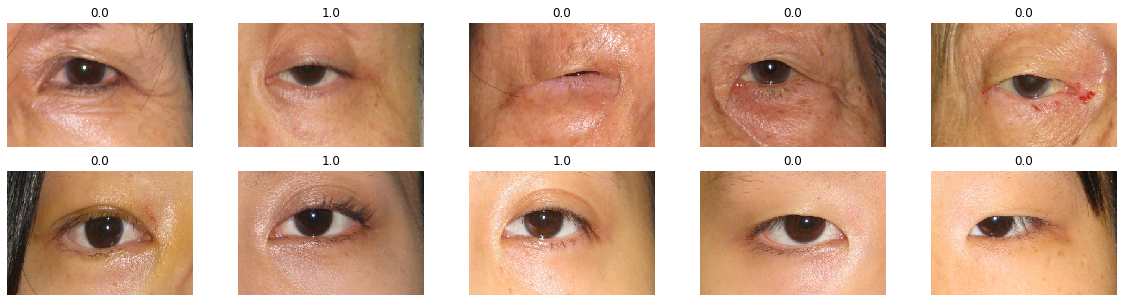

In [106]:
#load file path and labling using folder name
test_dir='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\test_add_pseudo' 
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(200, 300),
                                                              class_mode='binary')
#view all the testing data
#referance: https://www.tensorflow.org/tutorials/load_data/images
for i in range(5):
    image_batch, label_batch = next(test_data_gen)
    plt.figure(figsize=(20,5))
    for n in range(len(image_batch)):
        ax = plt.subplot(2,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(str(label_batch[n]))
        plt.axis('off')

In [176]:
#load file path and labling using folder name
ptosis_folder='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\test\\ptosis' 
normal_folder='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\test\\normal'
Filelist=[] #all file path in target folder
label=[] #all file name in target folder, aling with fildelist
for home, dirs, files in os.walk(ptosis_folder):  #load ptosis picture
    for filename in files:
        Filelist.append(os.path.join(home, filename))
        label.append(1)#lable as true
for home, dirs, files in os.walk(normal_folder):#load no ptosis picture
    for filename in files:
        Filelist.append(os.path.join(home, filename))
        label.append(0)#lable as false
for i in range(len(Filelist)):
        print(Filelist[i],label[i])

D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0006.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0018.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0027.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0035.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0036.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0042.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0157.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0159.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0160.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0161.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0162.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test\ptosis\0163.JPG 1
D:\ptosis_dection_project\part3_CNN_clas

In [113]:
#load file path and labling using folder name, only pseudotosis
pseudo_folder='D:\\ptosis_dection_project\\part3_CNN_classification\\Data3\\test_add_pseudo\\pseudoptosis' 
Filelist=[] #all file path in target folder
label=[] #all file name in target folder, aling with fildelist
for home, dirs, files in os.walk(pseudo_folder):  #load ptosis picture
    for filename in files:
        Filelist.append(os.path.join(home, filename))
        label.append(1)#lable as true
for i in range(len(Filelist)):
        print(Filelist[i],label[i])

D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0016.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0024.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0038.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0060.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0087.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0088.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0095.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0118.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0154.JPG 1
D:\ptosis_dection_project\part3_CNN_classification\Data3\test_add_pseudo\pseudoptosis\0177.JPG 1
D:\ptosis_dection_project\part

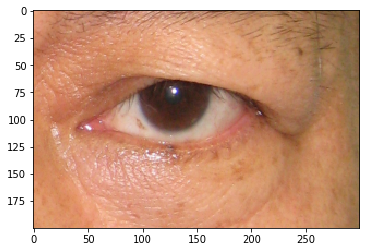

In [114]:
import cv2
from PIL import Image as PILLO
img=plt.imread(Filelist[27])
img = cv2.resize(img, (300,200), interpolation = cv2.INTER_AREA)
plt.imshow(img)

In [115]:
img=np.expand_dims(img, axis=0)
img = img.astype('float32')
#img=tf.convert_to_tensor(img)
prediction=model.predict(img/255)

In [116]:
prediction

array([[0.9999999]], dtype=float32)

In [117]:
n=len(Filelist)
prediction_results=[]
for i in range(n):
    img=plt.imread(Filelist[i])
    img = cv2.resize(img, (300,200), interpolation = cv2.INTER_AREA)
    img=np.expand_dims(img, axis=0)
    img = img.astype('float32') 
    prediction=model.predict(img/255)
    prediction_results.append(prediction[0])

Text(0, 0.5, 'model output value')

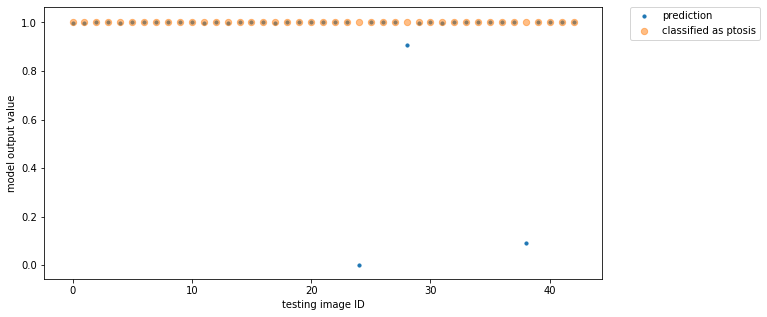

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(list(range(43)),prediction_results,s=10,alpha=1,label='prediction')
plt.scatter(list(range(43)),label,s=40,alpha=0.5,label='classified as ptosis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('testing image ID')
plt.ylabel('model output value')

In [35]:
#view ROC curve, referance: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
from sklearn.metrics import roc_curve
y_pred_keras = prediction_results
fpr_keras, tpr_keras, thresholds_keras = roc_curve(label, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

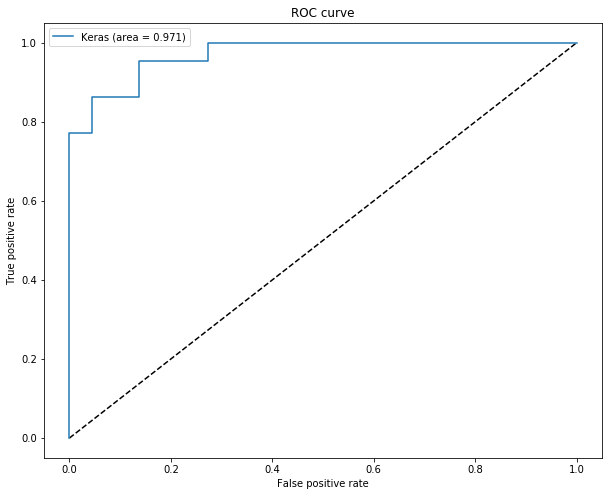

In [36]:
plt.figure(figsize=(10,8))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## view the picture that is wrongly classified

In [38]:
index_for_wrong=[]
for i in range(44):
    if abs(label[i]-prediction_results[i])>0.5:
        index_for_wrong.append(i)

In [39]:
index_for_wrong

[0, 22, 23, 29, 33, 35]

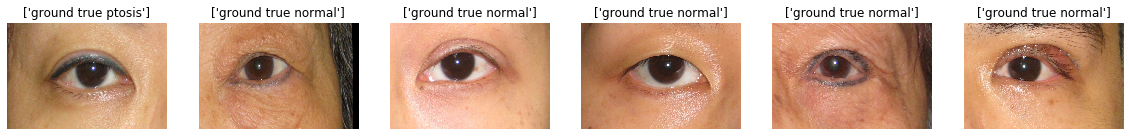

In [40]:
plt.figure(figsize=(20,10))
for i in range(6):
    ax = plt.subplot(1,6,i+1)
    img=plt.imread(Filelist[index_for_wrong[i]])
    plt.imshow(img)
    if label[index_for_wrong[i]]==1:
        l='ptosis'
    elif label[index_for_wrong[i]]==0:
        l='normal'
    plt.title(['ground true '+str(l)])
    plt.axis('off')

## Using Gradient Classification Activation map
referance:https://www.sicara.ai/blog/2019-08-28-interpretability-deep-learning-tensorflow

In [177]:
grad_model = tf.keras.Model([model.inputs], [model.get_layer('conv2d_5').output, model.output])

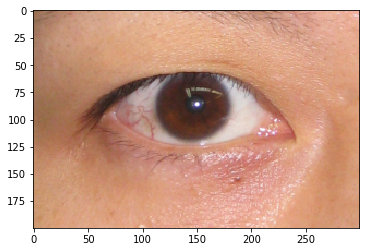

In [194]:
#load image
import cv2
from PIL import Image as PILLO
img=plt.imread(Filelist[43])
img = cv2.resize(img, (300,200), interpolation = cv2.INTER_AREA)
img=img/255
plt.imshow(img)

In [195]:
img=np.expand_dims(img,axis=0)
conv_outputs, predictions = grad_model(img)

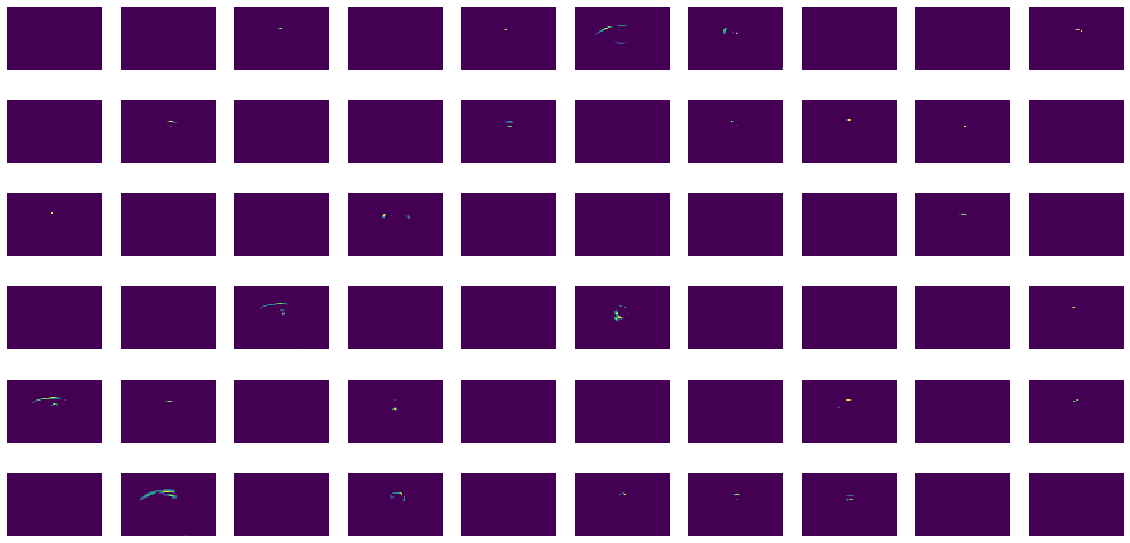

In [196]:
out=conv_outputs.numpy()
plt.figure(figsize=(20,10))
for n in range(60):
    ax=plt.subplot(6,10,n+1)
    plt.imshow(out[0,:,:,n])
    plt.axis('off')

(50, 75, 64)
(64,)


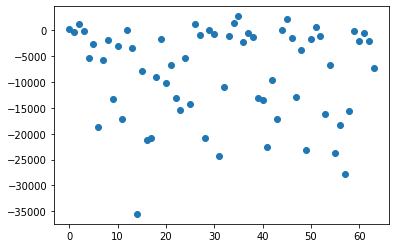

In [197]:
#compute gradient
with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions
grads = tape.gradient(loss, conv_outputs)
grads2=grads[0,:,:,:]
grads3 = tf.reduce_mean(grads2, axis=0)
print(np.shape(grads2.numpy()))
weights = tf.reduce_mean(grads3, axis=0)
print(np.shape(weights.numpy()))
plt.scatter(list(range(64)),weights*10000000)
plt.show()

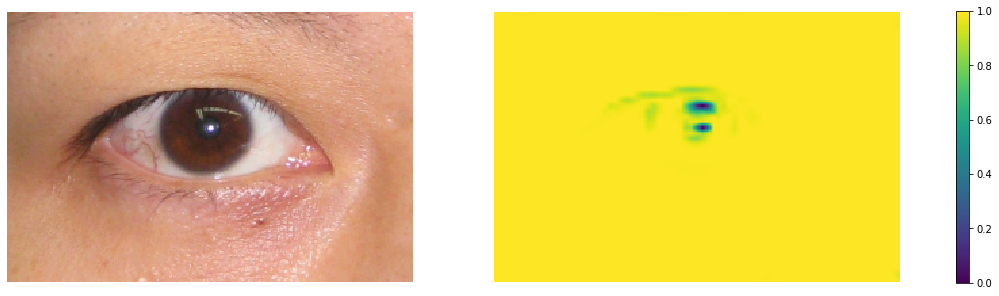

In [198]:
cam = np.zeros(out.shape[1:3], dtype=np.float32)
for index, w in enumerate(weights):
    cam += w*1000000 * out[0,:,:,index]
cam = cv2.resize(cam.numpy(), (300, 200))
heatmap = (cam - cam.min()) / (cam.max() - cam.min())
fig, ax = plt.subplots(1,2,figsize=(20,5))
#im_color = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
ax[0].imshow(img[0])
ax[0].axis('off')
im=ax[1].imshow(heatmap)
ax[1].axis('off')
fig.colorbar(im, ax=ax)

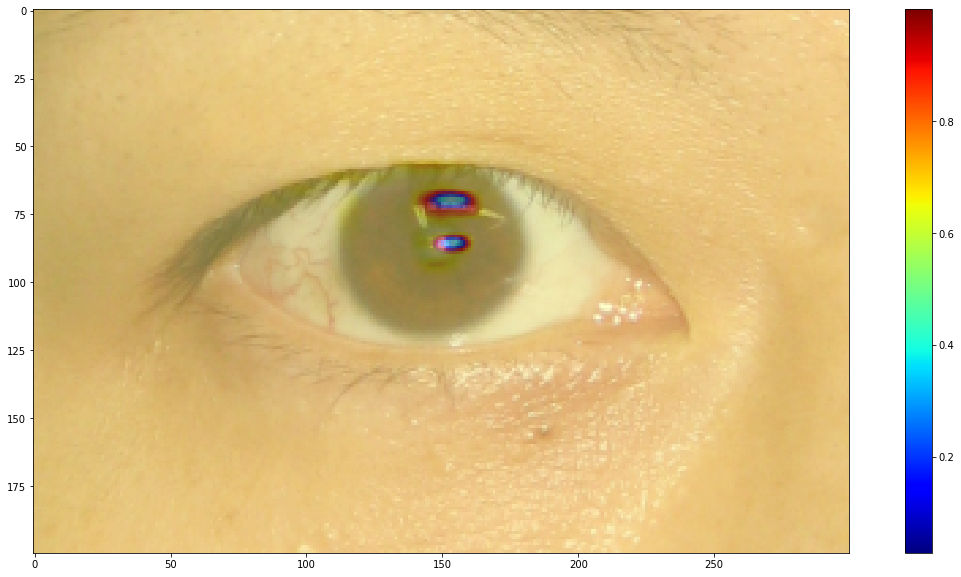

In [199]:
plt.figure(figsize=(20,10))
im_color = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
im_color=1-im_color/255
mix_img = cv2.addWeighted(img[0], 0.6, im_color, 0.4, 0, dtype = cv2.CV_32F)
plt.imshow(mix_img,cmap='jet')
plt.colorbar()